(module3-packages1/03-5-seaborn)=
# 5. Seaborn Part 1

# 1. Introduction
Seaborn is a Python data visualization library built on top of Matplotlib. It integrates well with Numpy Arrays and Pandas DataFrames and has built in support for statistics visualizations.
##  Seaborn vs. Matplotlib

| Feature                          | Matplotlib                                  | Seaborn                                                |
|----------------------------------|-------------------------------------------------|------------------------------------------------------------|
| Level                        | Low-level (more control, more code)             | High-level (less code, more automation)                    |
| Ease of Use                  | Requires more setup and manual styling          | Easy, concise functions with polished defaults             |
| Integration with Pandas      | Good, but often needs manual setup              | Excellent, designed for DataFrames                        |
| Plot Types                   | Wide variety, customizable                      | Focused on statistical plots and enhanced visuals      |
| Default Style                | Basic (needs customization for polish)          | Beautiful, color-optimized themes out of the box           |
| Best Use Cases              | Custom, detailed visualizations                  | Exploratory Data Analysis (EDA), fast, clean visuals   |
| Customization                | Maximum control over every element              | Customizable, but inherits from Matplotlib                |
| Performance                  | Very efficient for all types of plots           | Slightly higher overhead (due to additional processing)    |

## Install Seaborn

Open Ubuntu:
```bash
# if you are not in your environment activate with
conda activate YOUR_ENVIRONMENT
conda install seaborn seaborn-base
```

## Integration with Pandas DataFrames
Through keyword parameters Seaborn extracts title of variables in DataFrames and uses them as plot labels.  It does not do this with Numpy Arrays.  Note

<Axes: xlabel='Concentration', ylabel='Absorbance'>

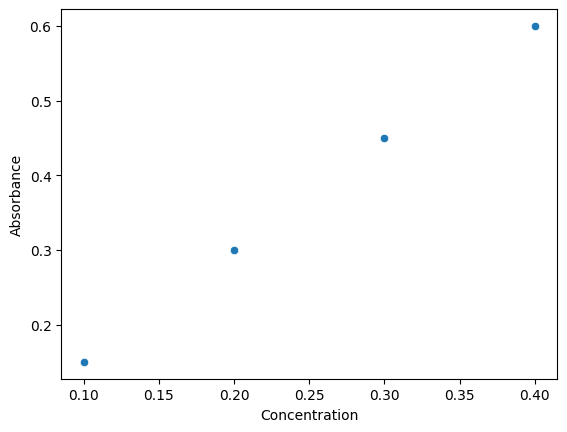

In [1]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    "Concentration": [0.1, 0.2, 0.3, 0.4],
    "Absorbance": [0.15, 0.30, 0.45, 0.60]
})
sns.scatterplot(x="Concentration", y="Absorbance", data=df)

If you want to plot two plots from a code cell you can integrate it with Numpy and use the plt.show() function.  The only difference between the two plots is the order of the arguments that are passed as parameters, and since these are keyword and not positional, the order does not matter

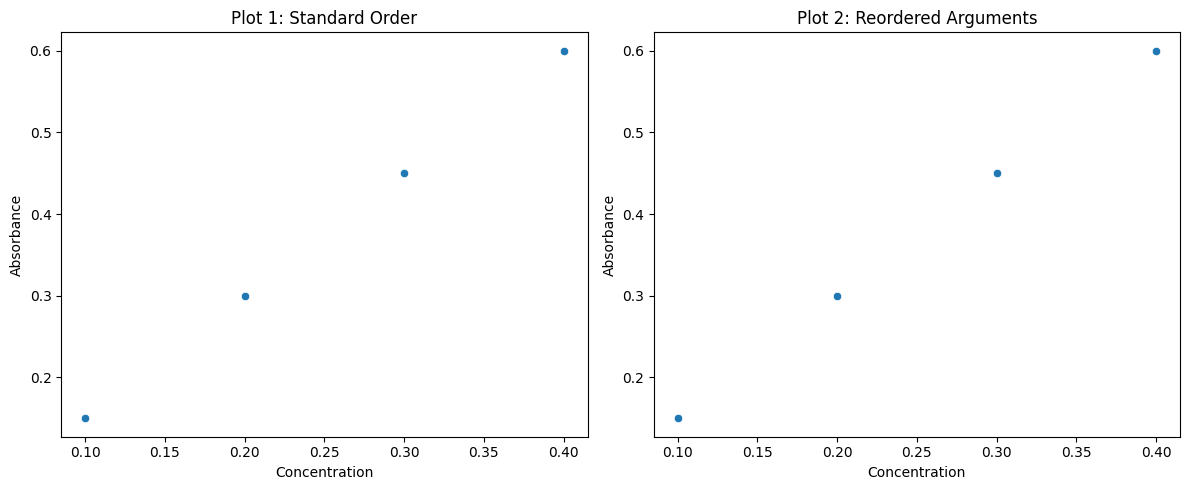

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    "Concentration": [0.1, 0.2, 0.3, 0.4],
    "Absorbance": [0.15, 0.30, 0.45, 0.60]
})

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot (standard order)
sns.scatterplot(x="Concentration", y="Absorbance", data=df, ax=axes[0])
axes[0].set_title("Plot 1: Standard Order")

# Second plot (reordered keyword arguments)
sns.scatterplot(data=df, x="Concentration", y="Absorbance", ax=axes[1])
axes[1].set_title("Plot 2: Reordered Arguments")

# Adjust layout
plt.tight_layout()
plt.show()



## Built-in Data Sets
Seaborn also comes with built-in data sets.  These data sets are not downloaded when you install Seaborn but accessed through this github [https://github.com/mwaskom/seaborn-data](https://github.com/mwaskom/seaborn-data) To get a list of the available datasets use the `sns.get_dataset_names()` function.

In [3]:
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


To load a dataset from the seaborn-data github into a pandas dataframe use
```python
df_name=sns.load_dataset(name)
```
The following command creates a dataframe called tips from the tips.csv file in the github

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


To plot the dataframe you simply choose the plot type and pass it the parameters

<Axes: xlabel='total_bill', ylabel='tip'>

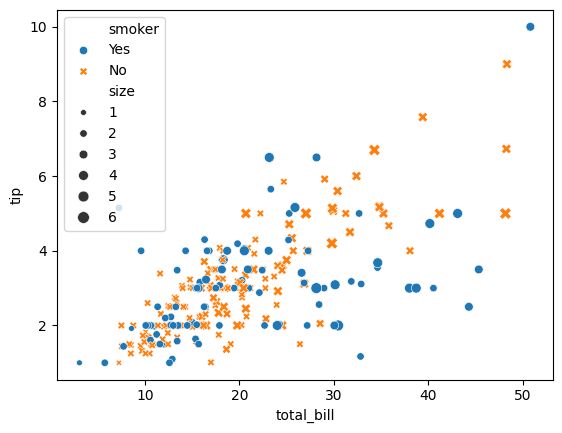

In [5]:
sns.scatterplot(
    data=tips,
    x="total_bill", y="tip",
    hue="smoker", style="smoker", size="size",
)

# 2. Seaborn Objects

## 2.1 Major Classes

| Class Object            | Description                                                                 |
|----------------------------|----------------------------------------------------------------------------------|
| `sns.FacetGrid`            | Creates a grid of plots for **multivariate visualizations** (e.g., small multiples). |
| `sns.PairGrid`             | Similar to `FacetGrid`, but optimized for **pairwise relationships** between variables. |
| `sns.JointGrid`            | Creates **joint plots** with **marginal plots** (e.g., scatter + histograms).   |
| `sns.axes_style`           | Manages **plot aesthetics and themes** (context, style, palette).               |
| `sns.color_palette`       | Manages and customizes **color schemes**.                                       |
| `sns.MovingAverage`        | Utility for **smoothing data** (less common).                                   |
| `sns.objects.Plot`         | Introduced in Seaborn v0.12+: A **new object-oriented API** for building plots. |

## 2.2 General Functions

| Function Type         | Function Name           | Description                                                   |
|--------------------------|------------------------------|-------------------------------------------------------------------|
| Plotting (general)       | `sns.plotting_context()`     | Sets font sizes and spacing for different contexts (e.g., "notebook"). |
| Plotting (style)         | `sns.set_style()`            | Sets background, grid, and overall plot style.                    |
| Plotting (theme)         | `sns.set_theme()`            | Sets Seaborn’s default aesthetics in one call.                    |
| Color management         | `sns.set_palette()`          | Sets color palette globally.                                      |
| Data loading             | `sns.load_dataset()`         | Loads example datasets from Seaborn’s GitHub repo.                |
| Display options          | `sns.despine()`              | Removes axis spines for a cleaner look.                           |
| Utility                  | `sns.palplot()`              | Visualizes color palettes.                                        |
| Object plotting (new API)| `sns.objects.Plot()`         | New plotting API introduced in Seaborn 0.12 (OOP approach).        |

## 2.3 Plotting Functions

Before diving into Seaborn Plot Functions lets look at the types of plots

| Category      | Purpose / What It Shows                                                                  | Data Type                                   | Common Applications                                                      |
|-------------------|-----------------------------------------------------------------------------------------------|-------------------------------------------------|------------------------------------------------------------------------------|
| **Relational**    | Shows **relationships between variables** (especially numeric).                              | Numeric vs. Numeric                             | Trends, correlations, comparisons over time or concentration, etc.           |
| **Distribution**  | Shows **how data is distributed** (e.g., shape, spread, outliers).                            | One or two Numeric variables                    | Understanding variability, skewness, normality, multimodal distributions.    |
| **Categorical**   | Compares **numeric values across categories**; explores **group differences**.               | Categorical vs. Numeric                         | Comparing experiments, groups, or chemical compounds.                        |
| **Regression**    | Shows **relationships with fitted models** (linear or nonlinear).                            | Numeric vs. Numeric                             | Model fitting (e.g., Beer's Law), trends with confidence intervals.          |
| **Matrix/Grid**   | Visualizes **entire datasets or relationships between many variables** at once.              | Multivariate (many variables)                   | Correlation matrices, similarity heatmaps, clustering analyses.              |
| **Multivariate**  | Combines multiple visualizations to explore **multiple variables at the same time**.         | Numeric + Categorical (often mixed)             | Detailed variable relationships, outlier detection, density visualization.   |

| Plot Type             | Seaborn Function         | Description                                                   |
|--------------------------|------------------------------|-------------------------------------------------------------------|
| **Relational**            |                              |                                                                   |
| Scatter Plot             | `sns.scatterplot()`          | Shows relationship between two numeric variables.                 |
| Line Plot                | `sns.lineplot()`             | Shows trends over a continuous variable (e.g., time).             |
| Relational (multi-plot)  | `sns.relplot()`              | High-level interface for `scatterplot` or `lineplot` + facets.    |
| **Distribution**          |                              |                                                                   |
| Histogram                | `sns.histplot()`             | Visualizes distribution of a variable.                            |
| KDE Plot                 | `sns.kdeplot()`              | Smooth density estimate of a variable.                            |
| ECDF Plot                | `sns.ecdfplot()`             | Empirical cumulative distribution function.                       |
| Distribution Grid        | `sns.displot()`              | High-level histogram/KDE with facets.                             |
| Rug Plot                 | `sns.rugplot()`              | Small ticks at data points to show distribution.                  |
| **Categorical**           |                              |                                                                   |
| Box Plot                 | `sns.boxplot()`              | Shows distributions with quartiles and outliers.                  |
| Violin Plot              | `sns.violinplot()`           | Combines KDE with box plot.                                       |
| Strip Plot               | `sns.stripplot()`            | Individual data points, possibly jittered.                        |
| Swarm Plot               | `sns.swarmplot()`            | Adjusts points to avoid overlap (non-overlapping stripplot).      |
| Bar Plot                 | `sns.barplot()`              | Aggregated values (e.g., mean) with error bars.                   |
| Count Plot               | `sns.countplot()`            | Counts occurrences in categories.                                 |
| Categorical (multi-plot) | `sns.catplot()`              | High-level interface for all categorical plots + facets.          |
| **Regression**            |                              |                                                                   |
| Regression Plot          | `sns.regplot()`              | Scatterplot with regression line.                                 |
| Logistic Regression      | `sns.lmplot()`               | High-level regplot + facets (linear model plot).                  |
| **Matrix/Grid/Heatmap**   |                              |                                                                   |
| Heatmap                  | `sns.heatmap()`              | Color-coded matrix, e.g., correlations.                           |
| Clustermap               | `sns.clustermap()`           | Heatmap with clustering of rows/columns.                          |
| Pairwise Plots           | `sns.pairplot()`             | Matrix of scatterplots and histograms for multiple variables.     |
| **Multivariate/Joint**    |                              |                                                                   |
| Joint Plot               | `sns.jointplot()`            | Combines scatterplot with histograms/KDEs (uses JointGrid).       |
| **New API (v0.12+)**      |                              |                                                                   |
| Plot Object              | `sns.objects.Plot()`         | New object-oriented plotting system.                              |


# 3. Seaborn Plots
First we will load the pubchem periodic table into a dataframe that we will call df, just to keep it short.  We created this in module 02-6_ExternalDataStructures.  If you look at the file PubChemElements_all.csv you will see that the second column is the symbols (index number 1) and the following code reads the file and sets the symbols as indices
```python
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
```

The file path we are using was created in module 02-6 and you can download the periodic table directly as a csv from PubChem: [https://pubchem.ncbi.nlm.nih.gov/periodic-table/](https://pubchem.ncbi.nlm.nih.gov/periodic-table/)

In [6]:
import pandas as pd
import os
base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df.head()

,AtomicNumber,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
Symbol,,,,,,,,,,,,,,,,
H,1,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
He,2,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
Li,3,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
Be,4,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
B,5,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


## 3.1 Relational Plots

### Scatterplot: sns.scatterplot()
First run the following code and see the type of data in the dataframe

In [7]:
print(df.columns)
print(df["GroupBlock"].unique())
print(df["StandardState"].unique())

Index(['AtomicNumber', 'Name', 'AtomicMass', 'CPKHexColor',
       'ElectronConfiguration', 'Electronegativity', 'AtomicRadius',
       'IonizationEnergy', 'ElectronAffinity', 'OxidationStates',
       'StandardState', 'MeltingPoint', 'BoilingPoint', 'Density',
       'GroupBlock', 'YearDiscovered'],
      dtype='object')
['Nonmetal' 'Noble gas' 'Alkali metal' 'Alkaline earth metal' 'Metalloid'
 'Halogen' 'Post-transition metal' 'Transition metal' 'Lanthanide'
 'Actinide']
['Gas' 'Solid' 'Liquid' 'Expected to be a Solid' 'Expected to be a Gas']


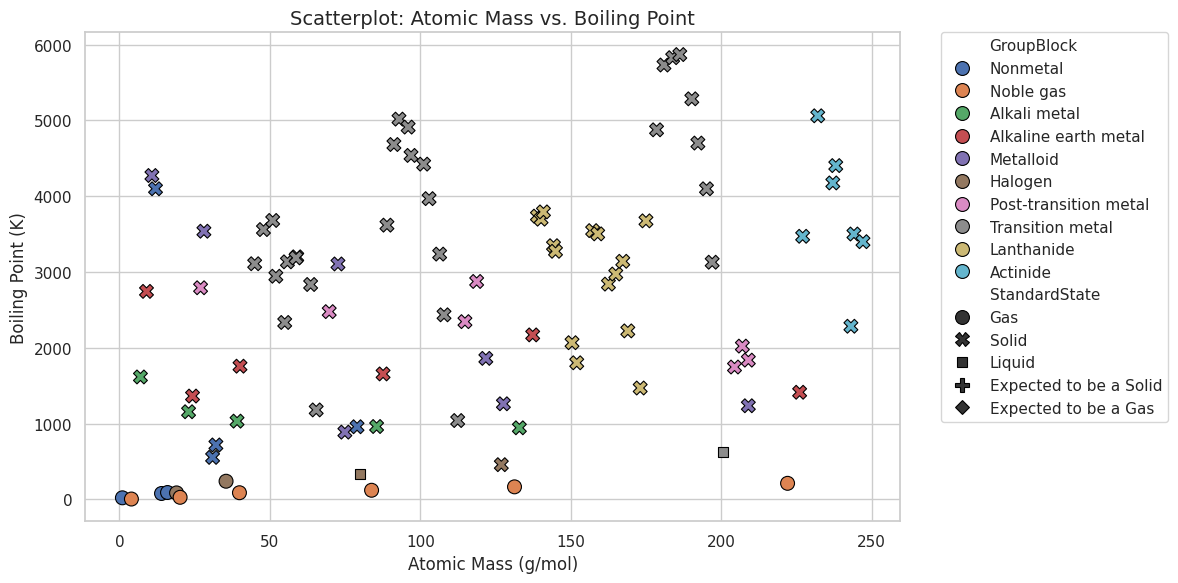

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame (assuming index_col=0 is used for symbols)
#df = pd.read_csv("pubchem_periodic_table.csv", index_col=0)

# Set Seaborn style
sns.set(style="whitegrid")

# Create scatterplot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x="AtomicMass",           # Column from DataFrame for X-axis
    y="BoilingPoint",         # Column from DataFrame for Y-axis
    hue="GroupBlock",         # Column for color-coding (legend)
    style="StandardState",    # Column for marker style (legend)
    s=100,                    # Marker size
    edgecolor="black"         # Border color around markers
)

plt.title("Scatterplot: Atomic Mass vs. Boiling Point", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Boiling Point (K)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


OK, what happened?
In the following code we defined what we plotted in the scatter plot and seaborn set up the plot, legend and all!
```python
scatter = sns.scatterplot(
    data=df,
    x="AtomicMass",           # Column from DataFrame for X-axis
    y="BoilingPoint",         # Column from DataFrame for Y-axis
    hue="GroupBlock",         # Column for color-coding (legend)
    style="StandardState",    # Column for marker style (legend)
    s=100,                    # Marker size
    edgecolor="black"         # Border color around markers
)

```

### Line Plot: sns.lineplot()
A **line plot connects the points** if you want to do a best fit you need to run a regression type plot. Here we are using annotations instead of a legend  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


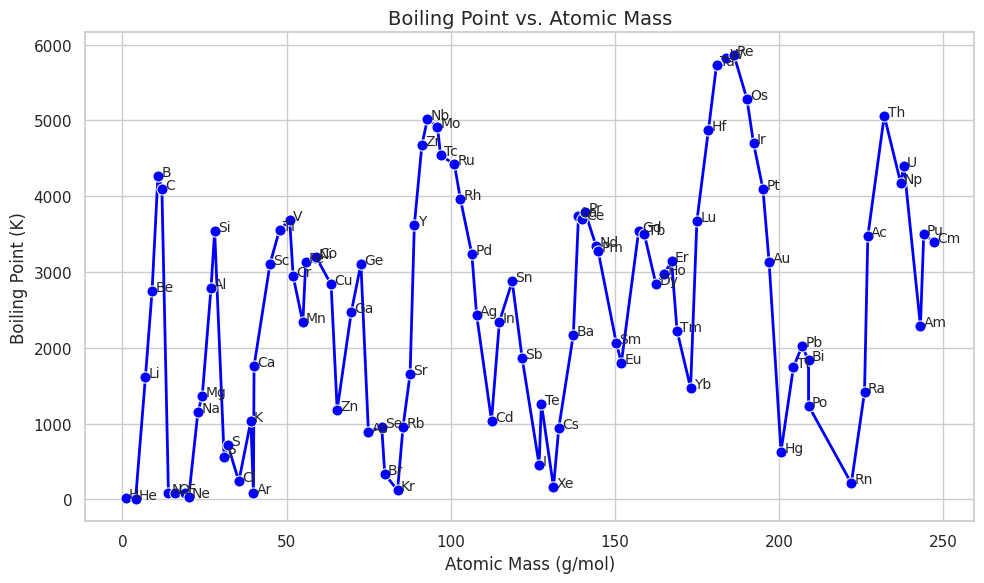

In [30]:

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="AtomicMass",
    y="BoilingPoint",
    marker="o",
    color="blue",
    linewidth=2,
    markersize=8
)

# Annotate each point with the element symbol
for symbol, row in df.iterrows():
    plt.text(row["AtomicMass"] + 1, row["BoilingPoint"], symbol, fontsize=10)

plt.title("Boiling Point vs. Atomic Mass", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Boiling Point (K)")
plt.tight_layout()
plt.show()



Now filter for halogens
Note the annotations for Cl and Br are covered by the line. This is controlled by the following line of code:
```python
plt.text(row["AtomicMass"] + 1, row["BoilingPoint"], symbol)

```
We can make custom offsets with a dictionary
```python
# Custom offsets: symbol → (x_offset, y_offset)
offsets = {
    'F': (1, 5),
    'Cl': (1, -20),   # Lower Cl
    'Br': (1, -20),   # Lower Br
    'I': (1, 5),
    'At': (1, 5),
    'Ts': (1, 5)
}

# Annotate with controlled placement
for symbol, row in halogens_df.iterrows():
    x_offset, y_offset = offsets.get(symbol, (1, 5))  # Default offset if missing
    plt.text(
        row["AtomicMass"] + x_offset,
        row["BoilingPoint"] + y_offset,
        symbol,
        fontsize=10
    )
```



posx and posy should be finite values
posx and posy should be finite values


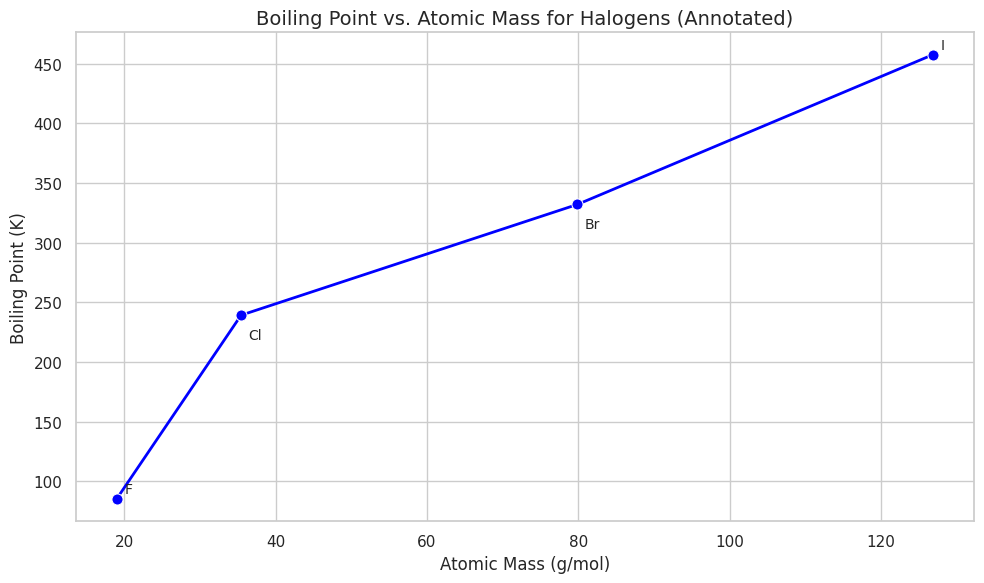

In [31]:
# Filter for Halogens
halogens_df = df[df["GroupBlock"] == "Halogen"]
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=halogens_df,
    x="AtomicMass",
    y="BoilingPoint",
    marker="o",
    color="blue",
    linewidth=2,
    markersize=8
)

# Custom offsets: symbol → (x_offset, y_offset)
offsets = {
    'F': (1, 5),
    'Cl': (1, -20),   # Lower Cl
    'Br': (1, -20),   # Lower Br
    'I': (1, 5),
    'At': (1, 5),
    'Ts': (1, 5)
}

# Annotate with controlled placement
for symbol, row in halogens_df.iterrows():
    x_offset, y_offset = offsets.get(symbol, (1, 5))  # Default offset if missing
    plt.text(
        row["AtomicMass"] + x_offset,
        row["BoilingPoint"] + y_offset,
        symbol,
        fontsize=10
    )

plt.title("Boiling Point vs. Atomic Mass for Halogens (Annotated)", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Boiling Point (K)")
plt.tight_layout()
plt.show()


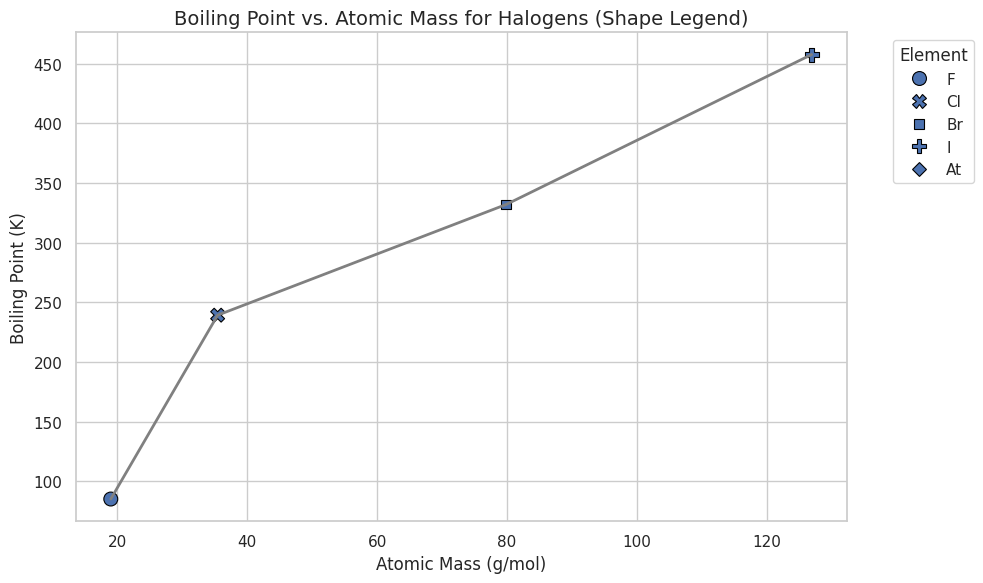

In [32]:
# Plot the line connecting all halogens (gray line)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=halogens_df,
    x="AtomicMass",
    y="BoilingPoint",
    color="gray",      # Single line color
    linewidth=2,
    marker=None        # No markers in lineplot here
)

# Overlay scatter points with unique shapes for each halogen
sns.scatterplot(
    data=halogens_df,
    x="AtomicMass",
    y="BoilingPoint",
    style=halogens_df.index,   # Different shape for each element
    s=100,
    edgecolor="black",
    legend=True
)

plt.title("Boiling Point vs. Atomic Mass for Halogens (Shape Legend)", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Boiling Point (K)")
plt.legend(title="Element", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


### Relation Plots + Faceting: sns.realplot()
- **Faceting** is splitting the data set into subsets and creating subplots for the subsets, all within one figure
- relplot() is a figure level function that allows you to make multiple scatter or line plots

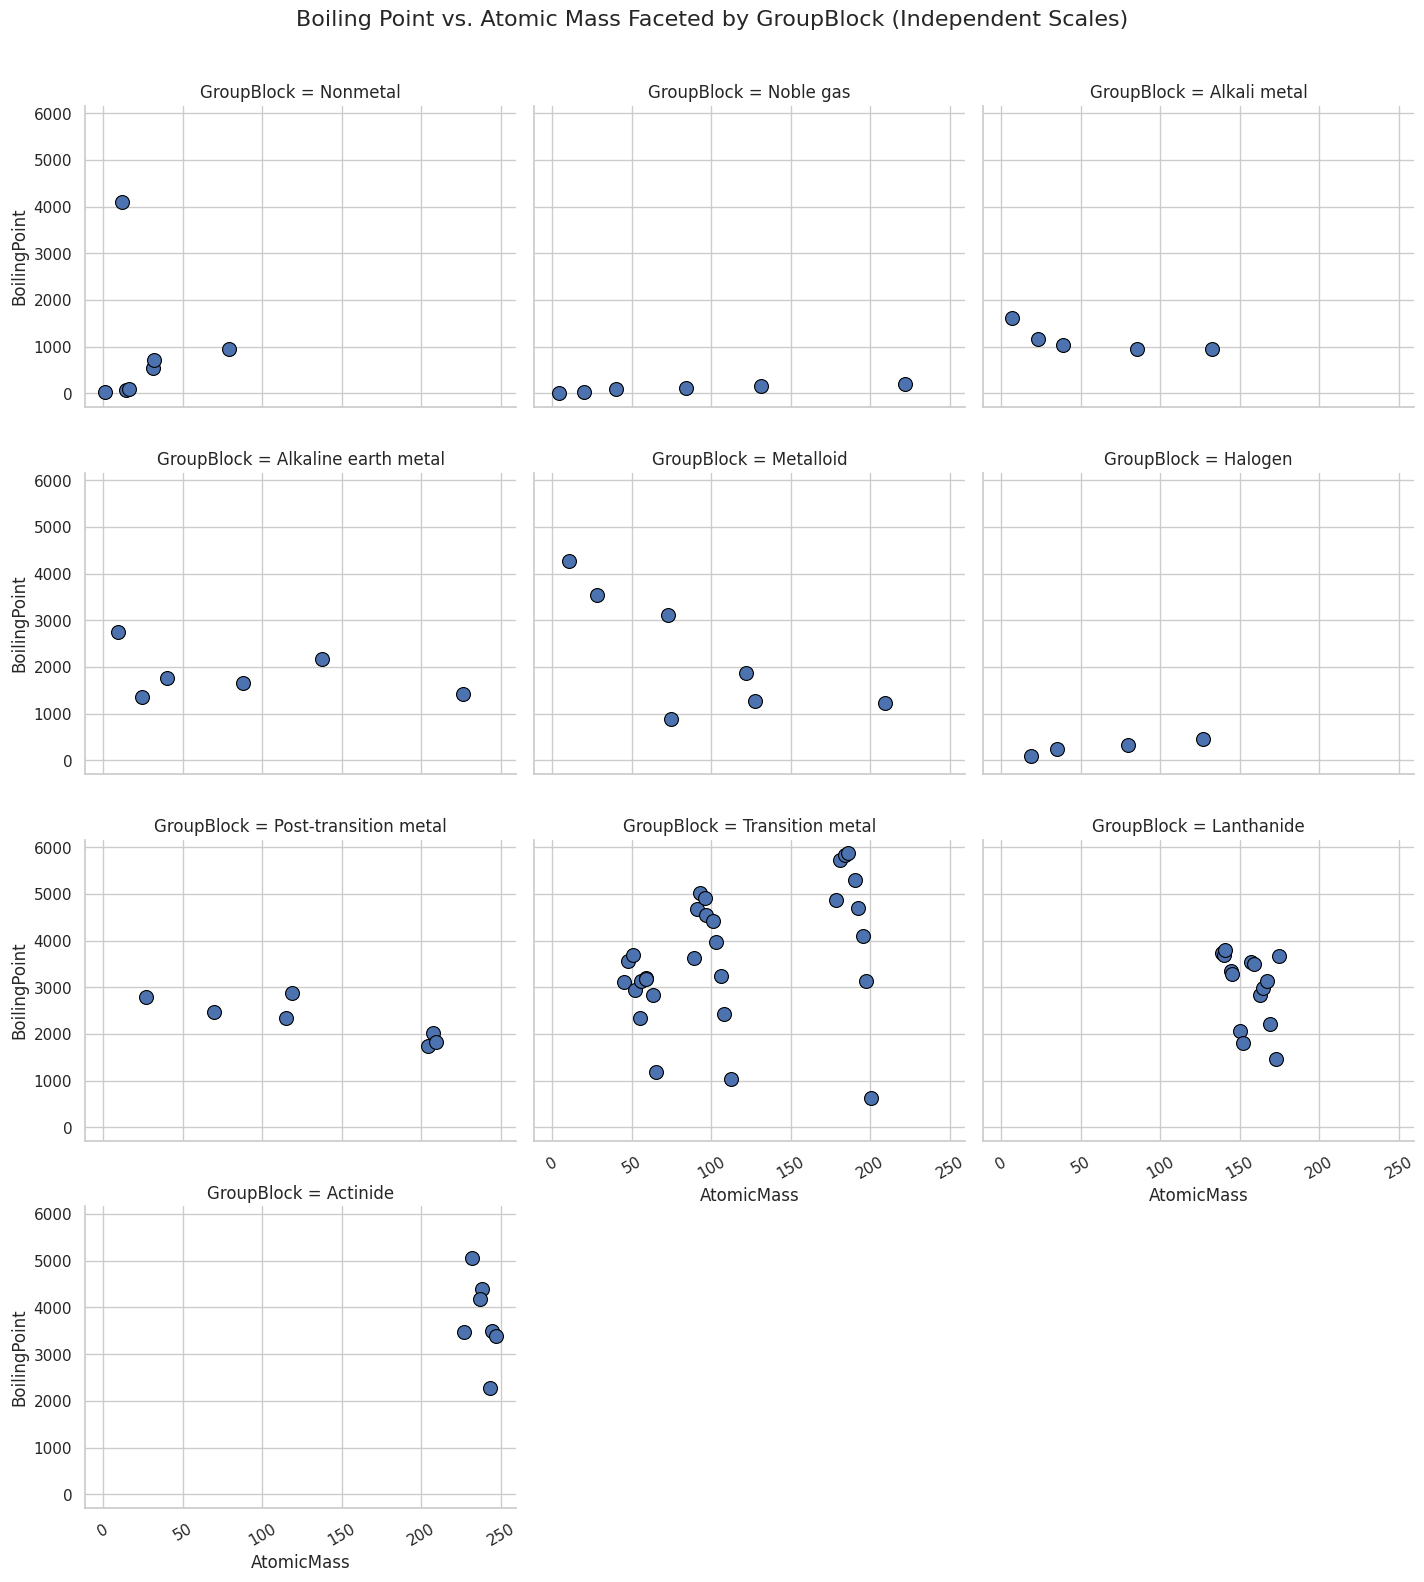

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# relplot: Boiling Point vs. Atomic Mass, faceted by GroupBlock with individual scales
g = sns.relplot(
    data=df,
    x="AtomicMass",
    y="BoilingPoint",
    kind="scatter",
    col="GroupBlock",
    col_wrap=3,
    height=4,
    aspect=1.2,
    s=100,
    edgecolor="black",
    #facet_kws={'sharex': False, 'sharey': False}  # Independent axes
)

# Rotate x-axis labels safely
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=30)

# Set common title
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Boiling Point vs. Atomic Mass Faceted by GroupBlock (Independent Scales)", fontsize=16)
plt.show()


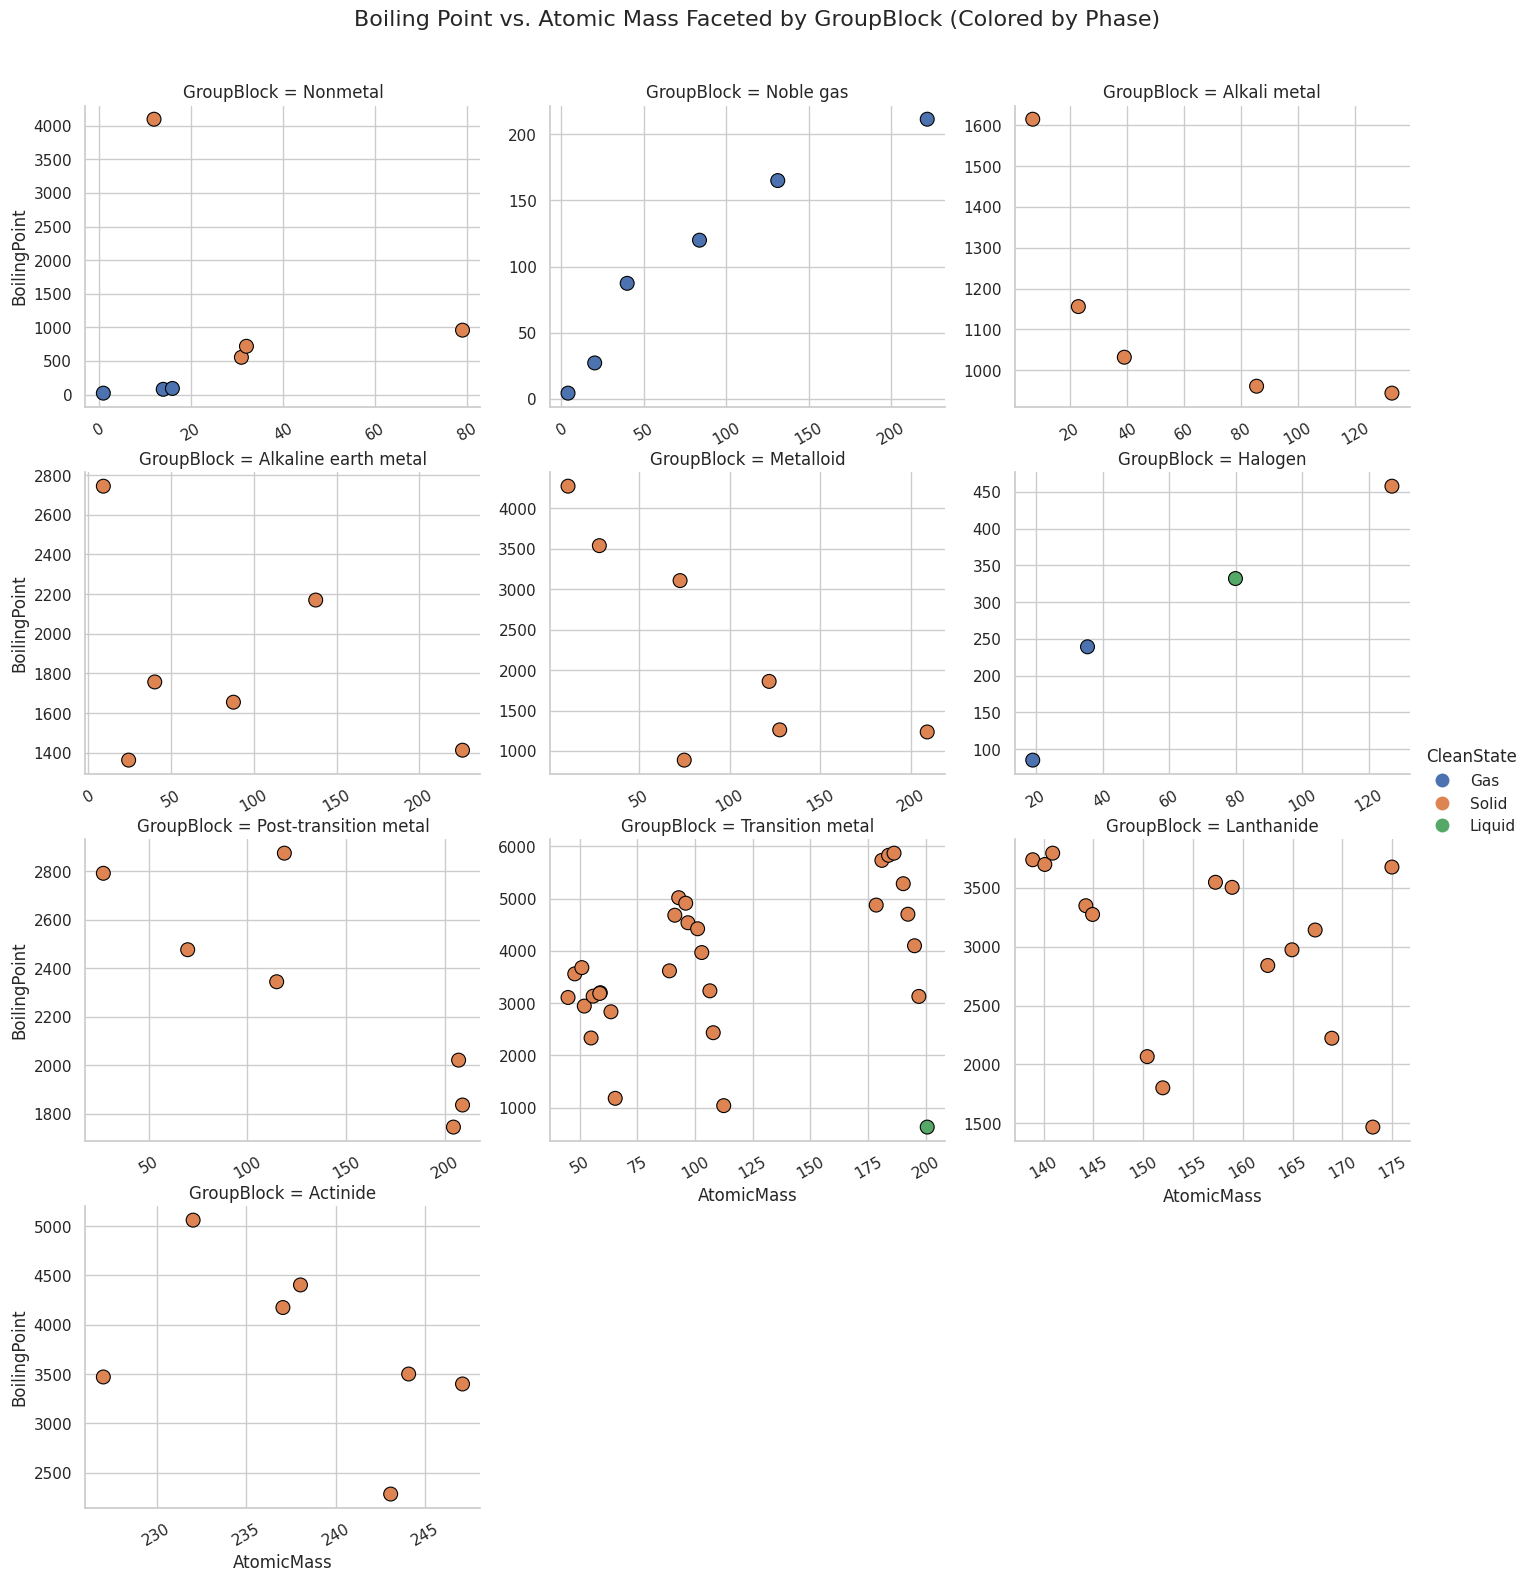

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the StandardState values
df["CleanState"] = df["StandardState"].replace({
    "expected solid": "Solid",
    "expected gas": "Gas",
    "expected liquid": "Liquid"
})

# Set style
sns.set(style="whitegrid")

# relplot with hue by CleanState (phase)
g = sns.relplot(
    data=df,
    x="AtomicMass",
    y="BoilingPoint",
    kind="scatter",
    hue="CleanState",             # Color by cleaned phase
    col="GroupBlock",
    col_wrap=3,
    height=4,
    aspect=1.2,
    s=100,
    edgecolor="black",
    facet_kws={'sharex': False, 'sharey': False}  # Independent scales
)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=30)

# Set title
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Boiling Point vs. Atomic Mass Faceted by GroupBlock (Colored by Phase)", fontsize=16)
plt.show()


## 3.2 Distribution Functions

### Histograms: sns.histplot()
Show distribution of a single variable by dividing it into bins and showing how many times it appears in a bin.

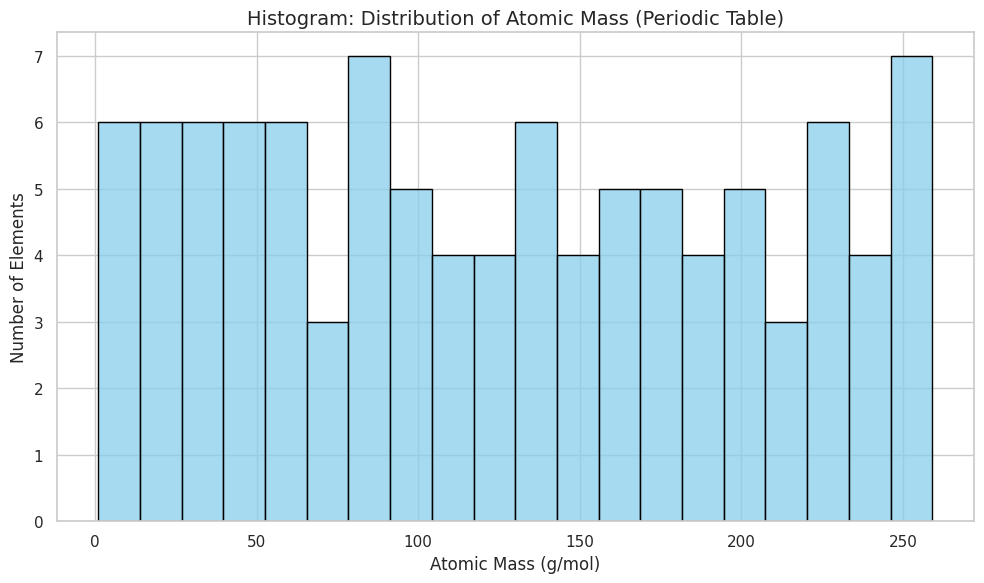

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="AtomicMass", bins=20, kde=False, color="skyblue", edgecolor="black")

plt.title("Histogram: Distribution of Atomic Mass (Periodic Table)", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Number of Elements")
plt.tight_layout()
plt.show()


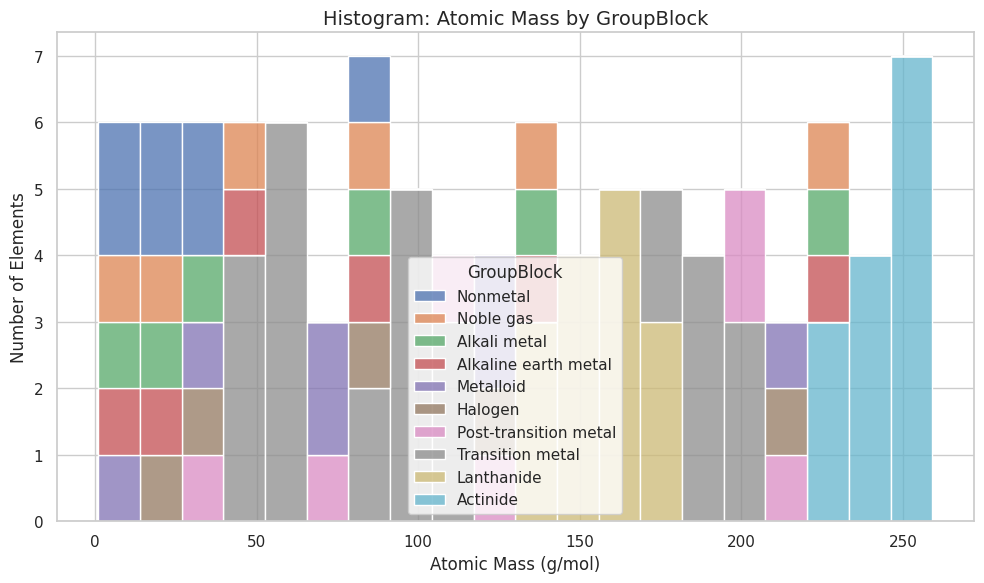

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="AtomicMass", hue="GroupBlock", multiple="stack", bins=20)

plt.title("Histogram: Atomic Mass by GroupBlock", fontsize=14)
plt.xlabel("Atomic Mass (g/mol)")
plt.ylabel("Number of Elements")
plt.tight_layout()
plt.show()


Now lets make

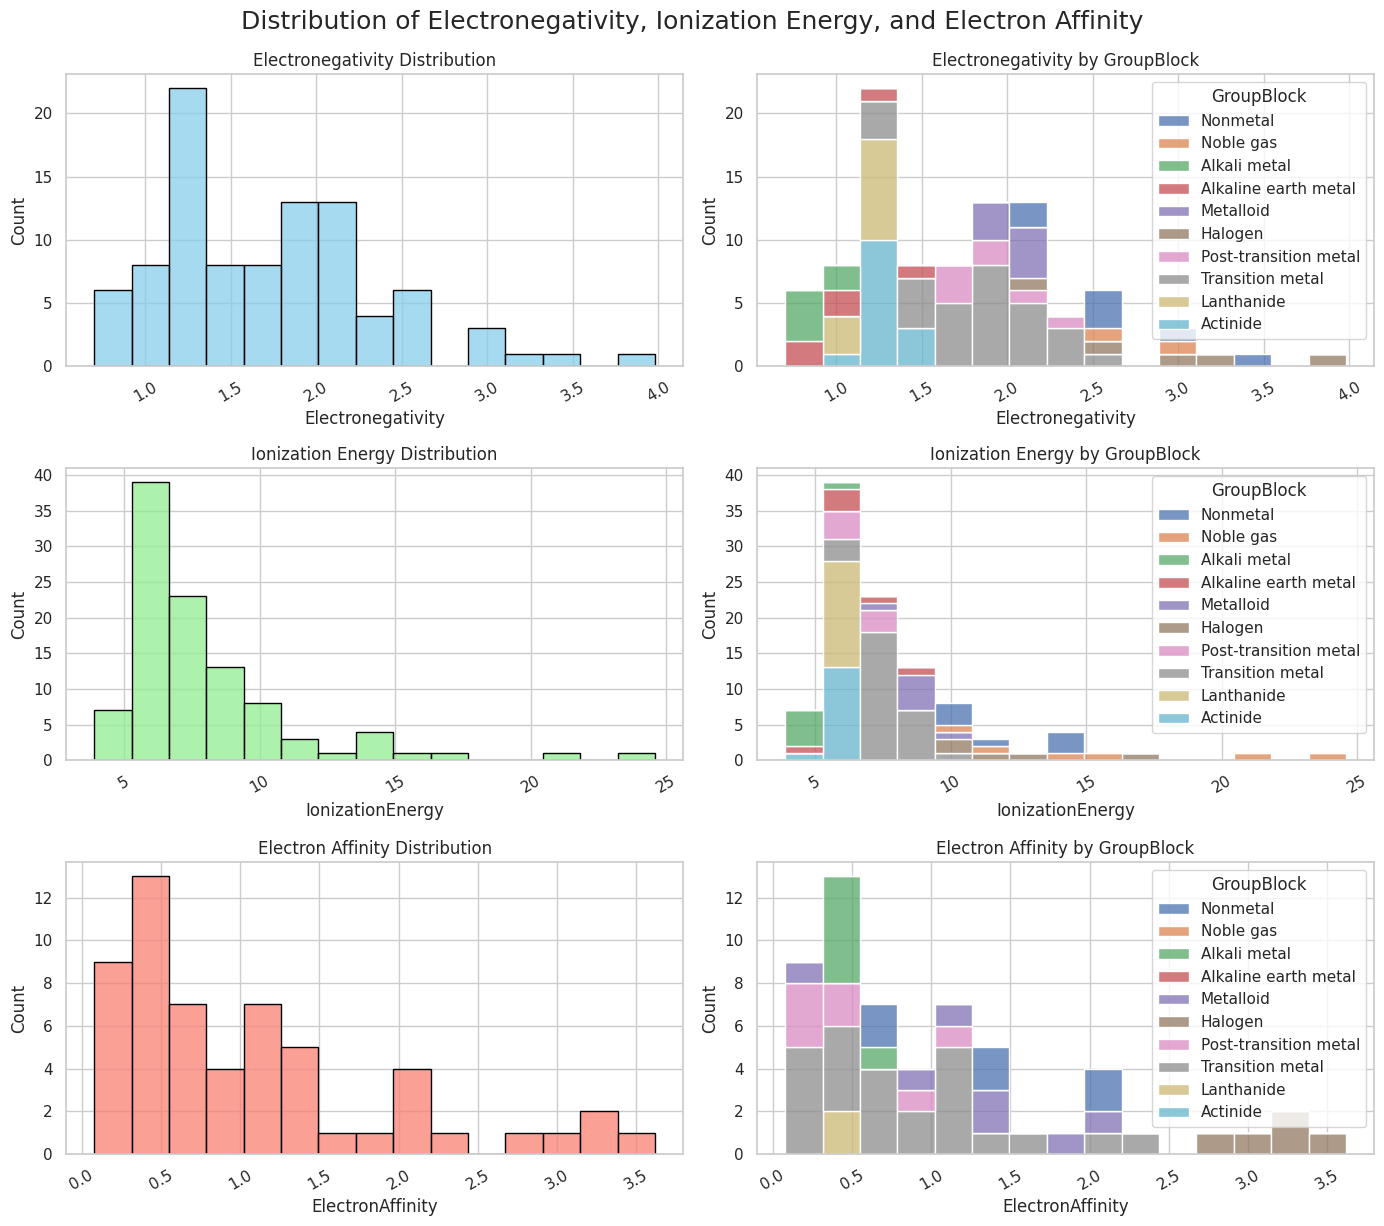

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create 3 rows x 2 columns grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# --- Row 1: Electronegativity ---
sns.histplot(data=df, x="Electronegativity", bins=15, kde=False,
             ax=axes[0, 0], color="skyblue", edgecolor="black")
axes[0, 0].set_title("Electronegativity Distribution")
axes[0, 0].set_ylabel("Count")

sns.histplot(data=df, x="Electronegativity", hue="GroupBlock", bins=15, multiple="stack",
             ax=axes[0, 1])
axes[0, 1].set_title("Electronegativity by GroupBlock")
axes[0, 1].set_ylabel("Count")

# --- Row 2: Ionization Energy ---
sns.histplot(data=df, x="IonizationEnergy", bins=15, kde=False,
             ax=axes[1, 0], color="lightgreen", edgecolor="black")
axes[1, 0].set_title("Ionization Energy Distribution")
axes[1, 0].set_ylabel("Count")

sns.histplot(data=df, x="IonizationEnergy", hue="GroupBlock", bins=15, multiple="stack",
             ax=axes[1, 1])
axes[1, 1].set_title("Ionization Energy by GroupBlock")
axes[1, 1].set_ylabel("Count")

# --- Row 3: Electron Affinity ---
sns.histplot(data=df, x="ElectronAffinity", bins=15, kde=False,
             ax=axes[2, 0], color="salmon", edgecolor="black")
axes[2, 0].set_title("Electron Affinity Distribution")
axes[2, 0].set_ylabel("Count")

sns.histplot(data=df, x="ElectronAffinity", hue="GroupBlock", bins=15, multiple="stack",
             ax=axes[2, 1])
axes[2, 1].set_title("Electron Affinity by GroupBlock")
axes[2, 1].set_ylabel("Count")

# Rotate x-axis labels for clarity
for ax_row in axes:
    for ax in ax_row:
        ax.tick_params(axis='x', rotation=30)

# Adjust layout and common title
fig.tight_layout()
fig.suptitle("Distribution of Electronegativity, Ionization Energy, and Electron Affinity", fontsize=18, y=1.02)
plt.show()


## Subplots vs. Faceted Plots
### Subplots (Matplotlib's plt.subplot())
- Each subplot is independent
- Mixed subplot types
### Facets (Seaborn's FacetGrid)
- used in relplot(), catplot()..
- you give Seaborn variable to facet (roe= , col= , hue=)
- Faceting is data driven
- Limited to one plot type at a time across all facets

| Feature            | Subplots (`plt.subplots`)                | Facets (`relplot`, `FacetGrid`)                 |
|--------------------|------------------------------------------|------------------------------------------------|
| Control            | Full manual control (plot type, data)    | Auto-splits data by variable, same plot type   |
| Data Management    | You manage what data goes in each plot   | Seaborn handles data splitting and plotting    |
| Flexibility        | Any combination of plots and data        | One plot type, applied to data subsets         |
| Use Case           | Mixed plots, advanced layouts            | Comparing same plot across groups (facets)     |


### KDE (Kernel Density Estimate)
- Smoothed version of a histogram
- best for continuous not discrete data

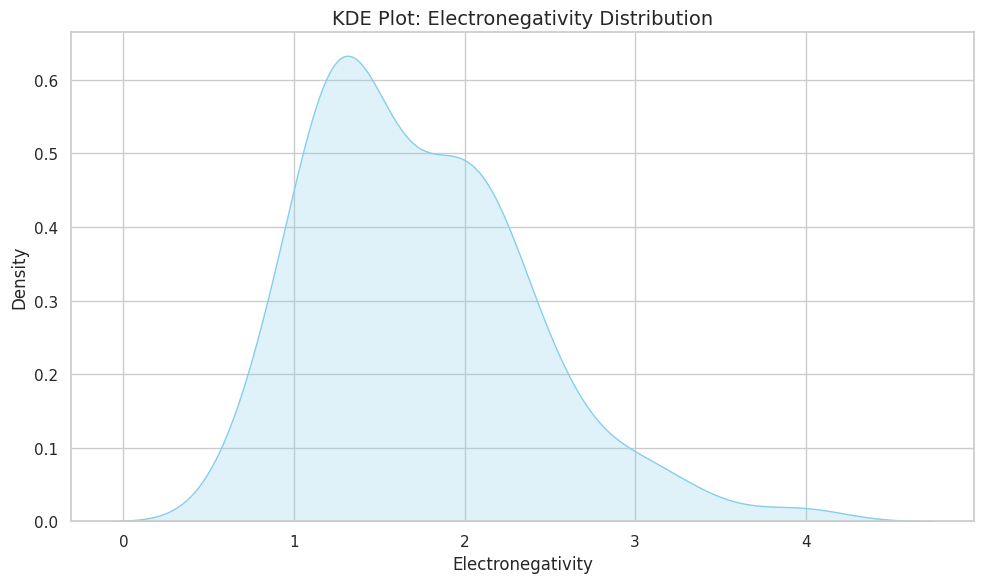

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Electronegativity", fill=True, color="skyblue")

plt.title("KDE Plot: Electronegativity Distribution", fontsize=14)
plt.xlabel("Electronegativity")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


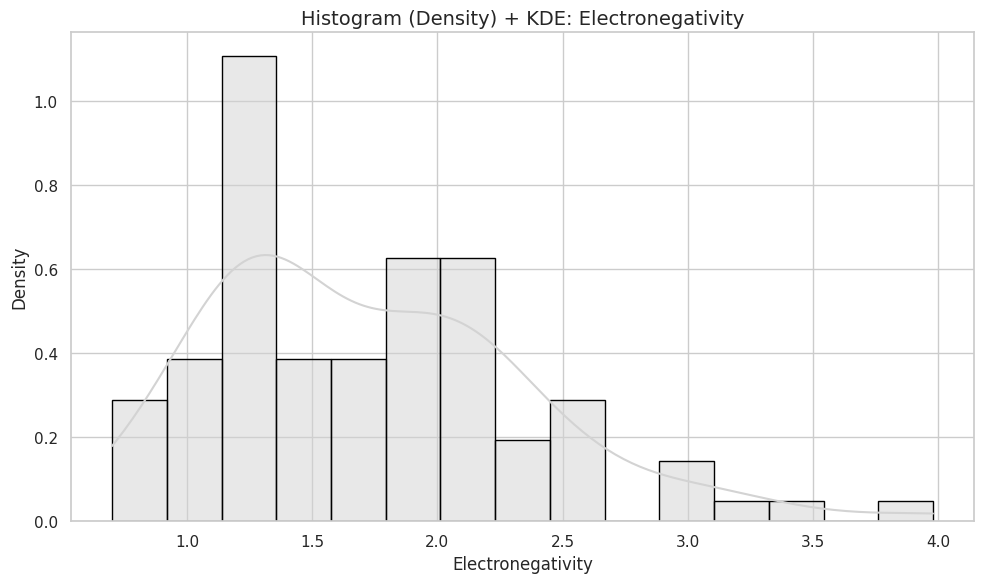

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Electronegativity", bins=15, kde=True, stat="density", color="lightgray", edgecolor="black")

plt.title("Histogram (Density) + KDE: Electronegativity", fontsize=14)
plt.xlabel("Electronegativity")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


KDE and histogram with dual scales

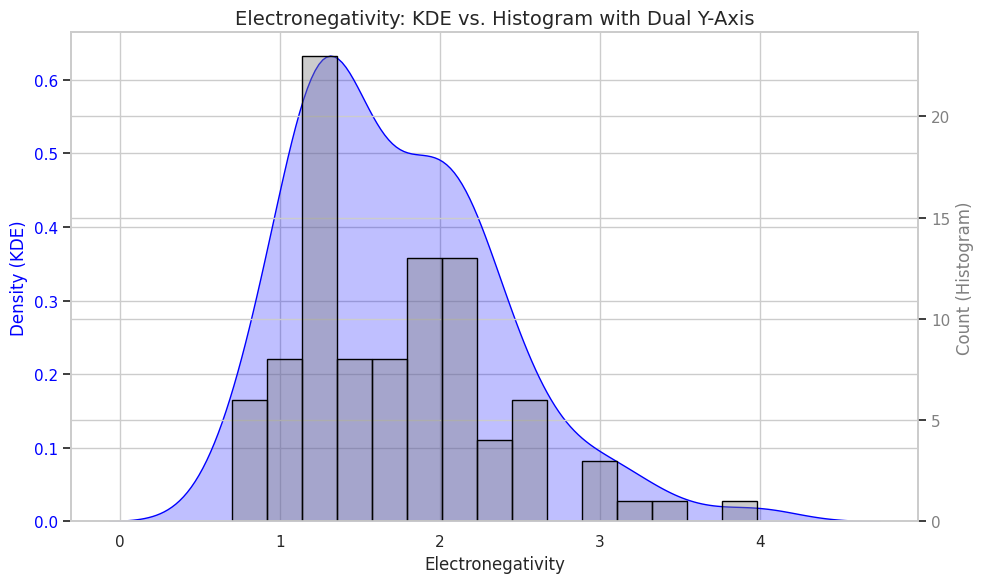

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create figure and primary axis (left)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KDE on ax1 (left Y-axis)
sns.kdeplot(data=df, x="Electronegativity", ax=ax1, color="blue", fill=True)
ax1.set_ylabel("Density (KDE)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create secondary axis (right)
ax2 = ax1.twinx()

# Plot histogram on ax2 (right Y-axis) with raw counts
sns.histplot(data=df, x="Electronegativity", bins=15, ax=ax2, color="gray", edgecolor="black", alpha=0.4)
ax2.set_ylabel("Count (Histogram)", color="gray")
ax2.tick_params(axis='y', labelcolor="gray")

# Titles and labels
plt.title("Electronegativity: KDE vs. Histogram with Dual Y-Axis", fontsize=14)
ax1.set_xlabel("Electronegativity")
plt.tight_layout()
plt.show()


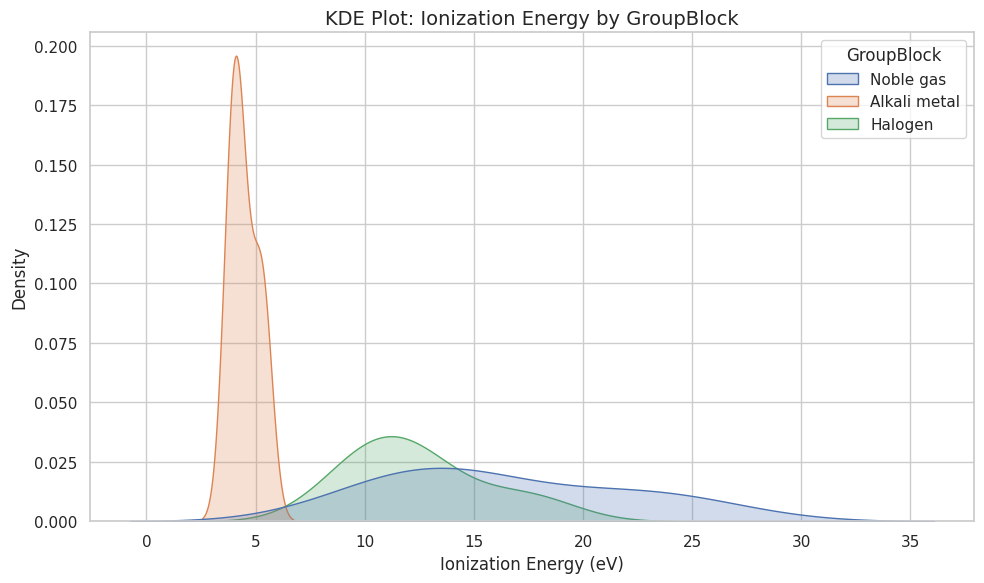

In [20]:
# Filter data to key GroupBlocks
groups = ["Alkali metal", "Halogen", "Noble gas"]
filtered_df = df[df["GroupBlock"].isin(groups)]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x="IonizationEnergy", hue="GroupBlock", fill=True)

plt.title("KDE Plot: Ionization Energy by GroupBlock", fontsize=14)
plt.xlabel("Ionization Energy (eV)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


### ECDF (Estimated Cumulative Distribution Function)

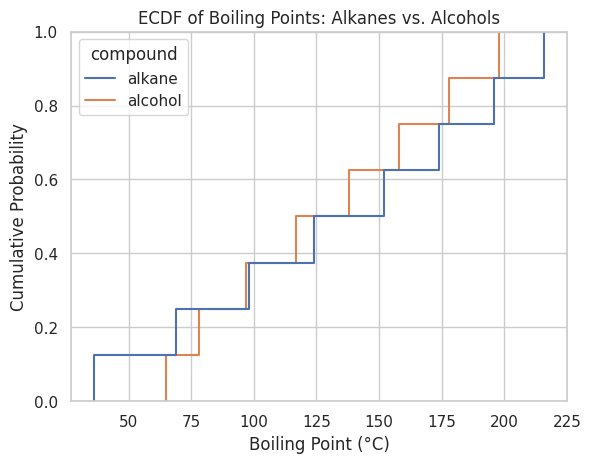

,compound,boiling_point
0,alkane,36
1,alkane,69
2,alkane,98
3,alkane,124
4,alkane,152
5,alkane,174
6,alkane,196
7,alkane,216
8,alcohol,65
9,alcohol,78


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulated data
data = {
    'compound': ['alkane'] * 8 + ['alcohol'] * 8,
    'boiling_point': [36, 69, 98, 124, 152, 174, 196, 216, 65, 78, 97, 117, 138, 158, 178, 198]
}
df = pd.DataFrame(data)

# ECDF plot
sns.ecdfplot(data=df, x='boiling_point', hue='compound')
plt.xlabel("Boiling Point (°C)")
plt.ylabel("Cumulative Probability")
plt.title("ECDF of Boiling Points: Alkanes vs. Alcohols")
plt.grid(True)
plt.show()
df

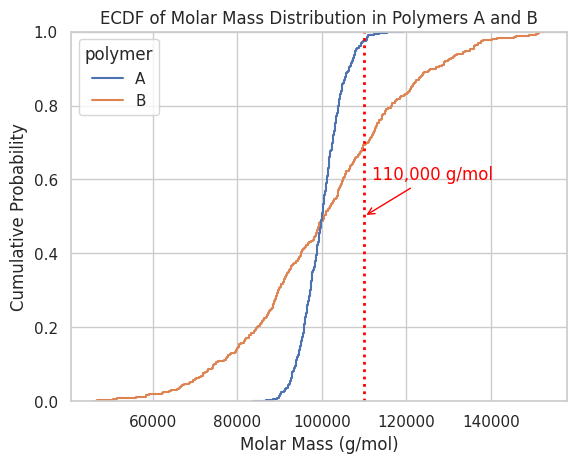

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate molar mass data (g/mol)
np.random.seed(42)

# Polymer A: Narrow distribution, centered at 100,000 g/mol
poly_a = np.random.normal(loc=100_000, scale=5_000, size=500)

# Polymer B: Broad distribution, centered at 100,000 g/mol
poly_b = np.random.normal(loc=100_000, scale=20_000, size=500)

# Combine into DataFrame
df = pd.DataFrame({
    'molar_mass': np.concatenate([poly_a, poly_b]),
    'polymer': ['A'] * 500 + ['B'] * 500
})

# Optional: Clean up any negative values (can happen with normal distribution)
df = df[df['molar_mass'] > 0]

# ECDF plot
sns.ecdfplot(data=df, x='molar_mass', hue='polymer')
plt.axvline(x=110_000, color='red', linestyle='dotted', linewidth=2, label='110,000 g/mol')
plt.xlabel("Molar Mass (g/mol)")
plt.annotate("110,000 g/mol",
             xy=(110_000, 0.5),
             xytext=(112_000, 0.6),
             arrowprops=dict(arrowstyle="->", color='red'),
             color='red')

plt.ylabel("Cumulative Probability")
plt.title("ECDF of Molar Mass Distribution in Polymers A and B")

plt.grid(True)
plt.show()


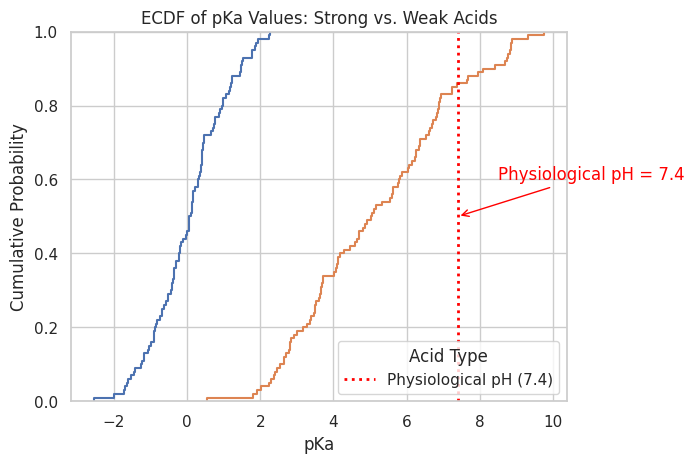

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Simulate pKa values
strong_acids = np.random.normal(loc=0, scale=1, size=100)     # Strong acids: pKa < 1
weak_acids = np.random.normal(loc=5, scale=2, size=100)       # Weak acids: pKa ~ 3–9

# Combine into DataFrame
df = pd.DataFrame({
    'pKa': np.concatenate([strong_acids, weak_acids]),
    'acid_type': ['Strong'] * len(strong_acids) + ['Weak'] * len(weak_acids)
})

# Filter out any unrealistic pKa values
df = df[(df['pKa'] > -5) & (df['pKa'] < 15)]

# Plot ECDF
sns.ecdfplot(data=df, x='pKa', hue='acid_type')

# Add physiological pH reference line
plt.axvline(x=7.4, color='red', linestyle='dotted', linewidth=2, label='Physiological pH (7.4)')

# Annotation
plt.annotate("Physiological pH = 7.4",
             xy=(7.4, 0.5),
             xytext=(8.5, 0.6),
             arrowprops=dict(arrowstyle="->", color='red'),
             color='red')

# Labels and legend
plt.xlabel("pKa")
plt.ylabel("Cumulative Probability")
plt.title("ECDF of pKa Values: Strong vs. Weak Acids")
plt.legend(title='Acid Type')
plt.grid(True)
plt.show()



### Distribution Grid (sns.displot())
Allows faceted histograms, it is essentially a combination of sns.histplot() + sns.FacetGrid()

        AtomicNumber       Name  AtomicMass CPKHexColor ElectronConfiguration  \
Symbol                                                                          
H                  1   Hydrogen    1.008000      FFFFFF                   1s1   
He                 2     Helium    4.002600      D9FFFF                   1s2   
Li                 3    Lithium    7.000000      CC80FF               [He]2s1   
Be                 4  Beryllium    9.012183      C2FF00               [He]2s2   
B                  5      Boron   10.810000      FFB5B5           [He]2s2 2p1   

        Electronegativity  AtomicRadius  IonizationEnergy  ElectronAffinity  \
Symbol                                                                        
H                    2.20         120.0            13.598             0.754   
He                    NaN         140.0            24.587               NaN   
Li                   0.98         182.0             5.392             0.618   
Be                   1.57         153

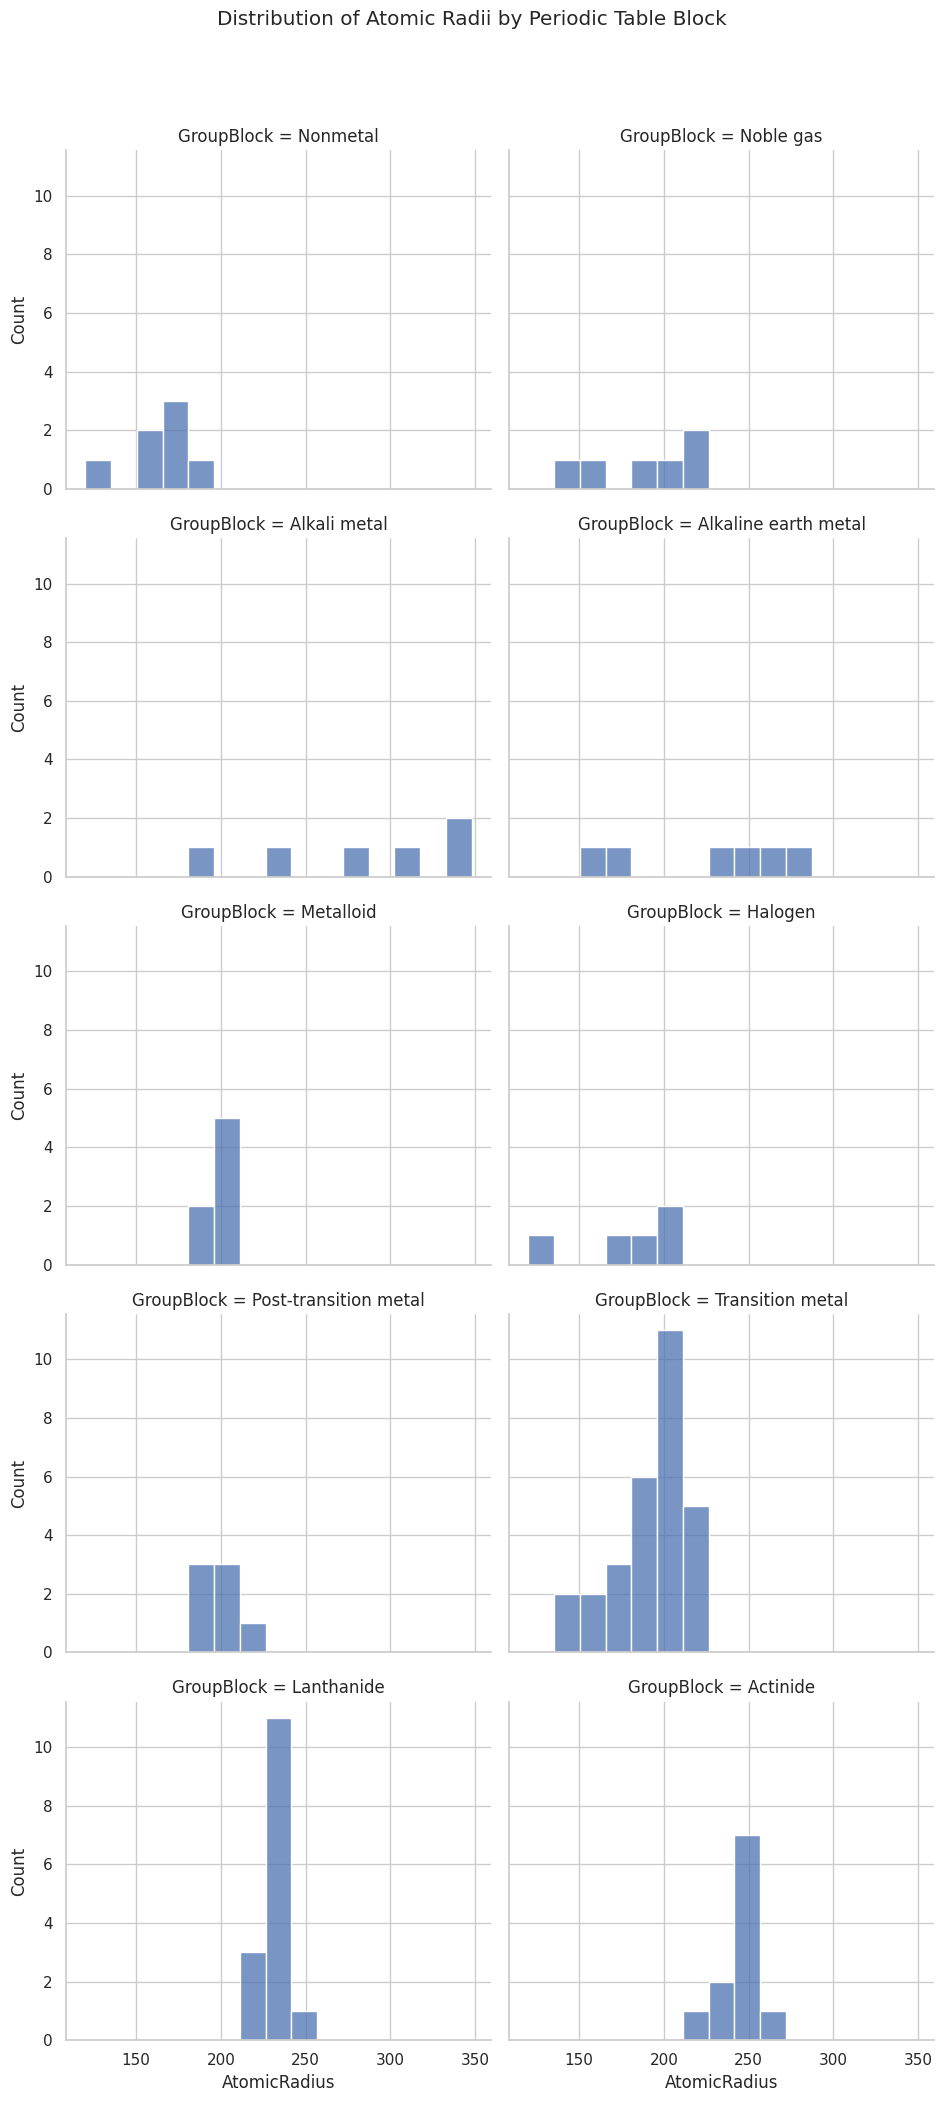

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
print(df.head())
# Replace this with your actual DataFrame if needed
#df = pd.read_csv("~/data/pubchem_periodic_table.csv")  # or use your in-memory version

# Drop NaNs if necessary
df = df.dropna(subset=["AtomicRadius", "GroupBlock"])

# Create the displot
sns.displot(data=df,
            x="AtomicRadius",
            col="GroupBlock",       # faceted by block
            col_wrap=2,        # wrap into a 2-column grid
            bins=15,
            height=4,
            aspect=1.2)

plt.suptitle("Distribution of Atomic Radii by Periodic Table Block", y=1.05)
plt.show()


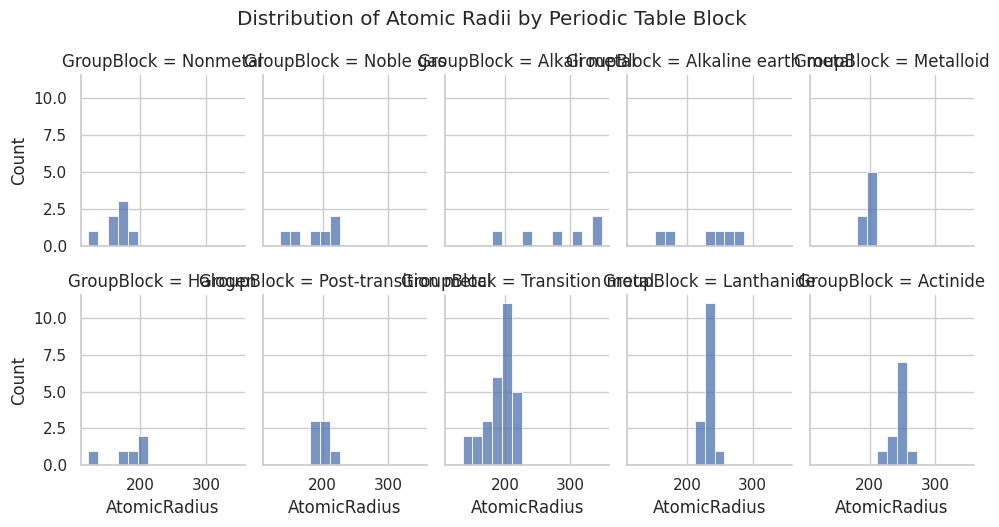

In [25]:
df = pd.read_csv(periodictable_csv_datapath, index_col=1)

# Replace this with your actual DataFrame if needed
#df = pd.read_csv("~/data/pubchem_periodic_table.csv")  # or use your in-memory version

# Drop NaNs if necessary
df = df.dropna(subset=["AtomicRadius", "GroupBlock"])

# Create the displot
sns.displot(data=df,
            x="AtomicRadius",
            col="GroupBlock",       # faceted by block
            col_wrap=5,        # wrap into a 2-column grid
            bins=15,
            height=2.5,
            aspect=0.8)

plt.suptitle("Distribution of Atomic Radii by Periodic Table Block", y=1.05)
plt.show()


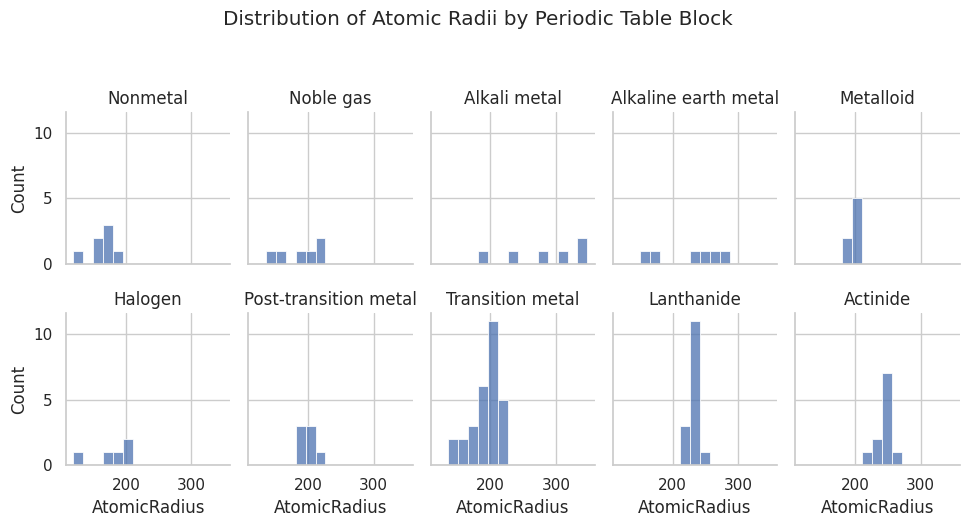

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)

# Drop missing values
df = df.dropna(subset=["AtomicRadius", "GroupBlock"])

# Create the displot and assign it to g
g = sns.displot(data=df,
                x="AtomicRadius",
                col="GroupBlock",       # Facet by GroupBlock
                col_wrap=5,
                bins=15,
                height=2.5,
                aspect=0.8)

# Remove "GroupBlock = " from titles
g.set_titles("{col_name}")

# Title and layout
plt.suptitle("Distribution of Atomic Radii by Periodic Table Block", y=1.05)
plt.tight_layout()
plt.show()


### Rug Plot 
Here we are plotting the KDE, which is a probablity density function with a rug plot under it
$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$


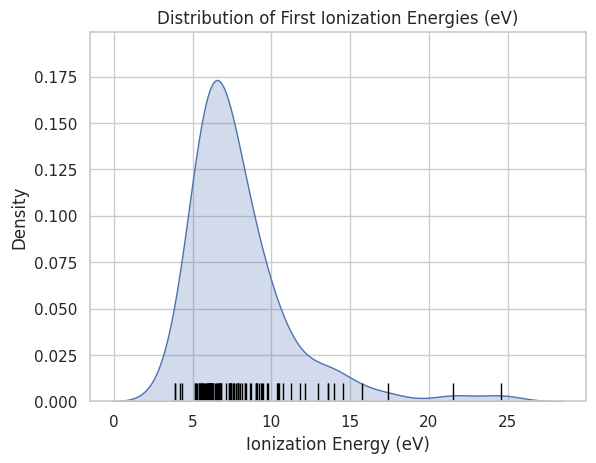

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load periodic table data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)

# Clean data
df = df.dropna(subset=["IonizationEnergy"])

# Plot KDE with rug
sns.kdeplot(data=df, x="IonizationEnergy", fill=True)
sns.rugplot(data=df, x="IonizationEnergy", height=0.05, color="black")

# Labels
plt.title("Distribution of First Ionization Energies (eV)")
plt.xlabel("Ionization Energy (eV)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


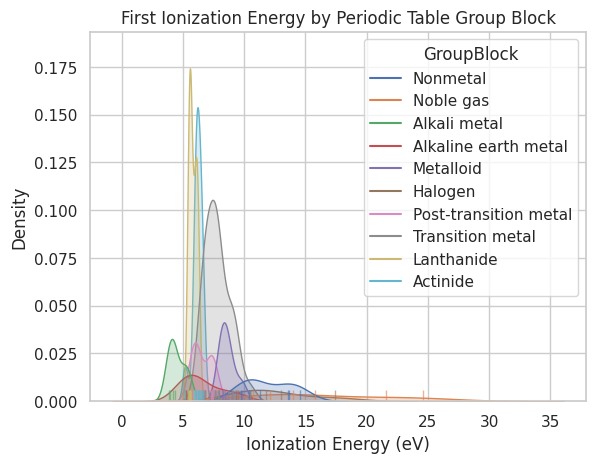

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean the data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["IonizationEnergy", "GroupBlock"])

# Plot KDE and rug, grouped by GroupBlock
sns.kdeplot(data=df, x="IonizationEnergy", hue="GroupBlock", fill=True)
sns.rugplot(data=df, x="IonizationEnergy", hue="GroupBlock", height=0.03, alpha=0.6)

# Labels
plt.title("First Ionization Energy by Periodic Table Group Block")
plt.xlabel("Ionization Energy (eV)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


# Acknowledgements
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.